# Lab 8: Define and Solve an ML Problem of Your Choosing

In [28]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [29]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head(10)

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True
5,I don't know why it won the National Book Awar...,False
6,The daughter of a prominent Boston doctor is d...,False
7,I was very disapointed in the book.Basicly the...,False
8,I think in retrospect I wasted my time on this...,False
9,I have a hard time understanding what it is th...,False


In [30]:
df.shape

(1973, 2)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

------------------------------------------------------------------------------------------------------------------
1) BookReviewDataSet
2) We will be predicting whether the review is +ve or -ve. The label is "Positive Review"
3) This is a supervised learning and a binary classification problem
4) Currently, we only have one feature: Review the text of the review. We’ll use Natural Language Processing techniques to extract useful features from this text like using TF-IDF or Count Vectorizer.
5) Such a model can help companies e.g. e-commerce platforms automatically determine the sentiment of book/product reviews. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [31]:
# YOUR CODE HERE
print(f"No. of Features: {df.shape[1]}")
print(f"Columns info: {df.info()}")

No. of Features: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 17.5+ KB
Columns info: None


In [32]:
df.isnull().sum()

Review             0
Positive Review    0
dtype: int64

In [33]:
target_y = df['Positive Review'].value_counts()
print(target_y)

False    993
True     980
Name: Positive Review, dtype: int64


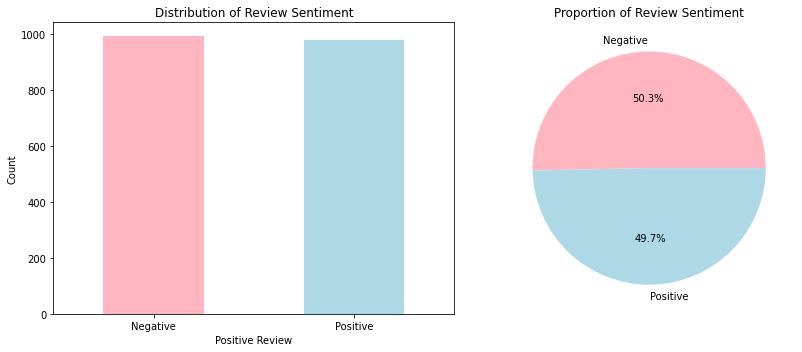

In [34]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
target_y.plot(kind='bar', color=['lightpink', 'lightblue'])
plt.title('Distribution of Review Sentiment')
plt.xlabel('Positive Review')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.subplot(1, 2, 2)
plt.pie(target_y.values, labels=['Negative', 'Positive'], autopct='%1.1f%%', colors=['lightpink', 'lightblue'])
plt.title('Proportion of Review Sentiment')
plt.tight_layout()
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

----------------------------------------------------------------------------------------
Primary feature, 'Review' (text data), additional features review_length, word_count. TF-IDF features from text
   
----------------------------------------------------------------------------------------

Text preprocessing: lowercase, remove punctuation, tokenization. Removing stopwords and applying lemmatization. we will handle any missing values. Feature engineering: TF-IDF vectorization. splitting data into train/validation/test sets
   
----------------------------------------------------------------------------------------
1. Logistic Regression 
2. Decision Tree
3. Random Forest
4. Ensemble methods
   
----------------------------------------------------------------------------------------
1. Using cross-validation for model selection
2. Evaluation metrics: Accuracy, Precision, Recall, F1-score, ROC-AUC
3. Hyperparameter tuning using GridSearchCV
4. Comparing model performances and select best model

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [35]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [36]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import re
import string

In [37]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /home/codio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/codio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/codio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/codio/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [38]:
# YOUR CODE HERE
from nltk.tokenize import wordpunct_tokenize
df_processed = df.copy()
def preprocess_text(text):
    if pd.isna(text):
        return ""  
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join(text.split())
    tokens = wordpunct_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

In [39]:
df_processed['processed_review'] = df_processed['Review'].apply(preprocess_text)
print(df_processed.head(10))

                                              Review  Positive Review  \
0  This was perhaps the best of Johannes Steinhof...             True   
1  This very fascinating book is a story written ...             True   
2  The four tales in this collection are beautifu...             True   
3  The book contained more profanity than I expec...            False   
4  We have now entered a second time of deep conc...             True   
5  I don't know why it won the National Book Awar...            False   
6  The daughter of a prominent Boston doctor is d...            False   
7  I was very disapointed in the book.Basicly the...            False   
8  I think in retrospect I wasted my time on this...            False   
9  I have a hard time understanding what it is th...            False   

                                    processed_review  
0  perhaps best johannes steinhoffs book since de...  
1  fascinating book story written form numerous l...  
2  four tale collection beautif

In [40]:
#feature extracting
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_processed['processed_review'])
y = df_processed['Positive Review']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Logistic regression:")
print(classification_report(y_test, lr_preds))

Logistic regression:
              precision    recall  f1-score   support

       False       0.85      0.85      0.85       195
        True       0.85      0.85      0.85       200

    accuracy                           0.85       395
   macro avg       0.85      0.85      0.85       395
weighted avg       0.85      0.85      0.85       395



In [43]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision tree:")
print(classification_report(y_test, dt_preds))

Decision tree:
              precision    recall  f1-score   support

       False       0.64      0.70      0.67       195
        True       0.68      0.62      0.65       200

    accuracy                           0.66       395
   macro avg       0.66      0.66      0.66       395
weighted avg       0.66      0.66      0.66       395



In [44]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("random forrest:")
print(classification_report(y_test, rf_preds))

random forrest:
              precision    recall  f1-score   support

       False       0.78      0.85      0.81       195
        True       0.84      0.77      0.80       200

    accuracy                           0.81       395
   macro avg       0.81      0.81      0.81       395
weighted avg       0.81      0.81      0.81       395



In [45]:
voting_model = VotingClassifier(estimators=[('lr', lr_model),('dt', dt_model),('rf', rf_model)], voting='hard')
scores = cross_val_score(voting_model, X, y, cv=5, scoring='accuracy')
print(f"Accuracy: {scores.mean():.4f}")

Accuracy: 0.7952


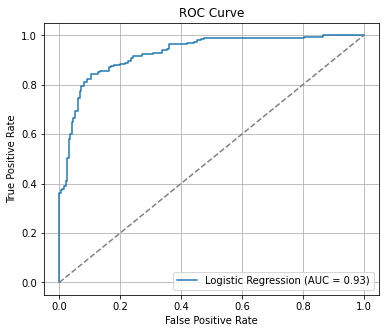

In [46]:
lr_probs = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
auc_score = roc_auc_score(y_test, lr_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

In [47]:
#hyperparameter tuning
param_grid = {'n_estimators': [100, 200],'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("CV Score:", grid_search.best_score_)

Best parameters: {'max_depth': 20, 'n_estimators': 200}
CV Score: 0.7686945500633713
